# Customer Segmentation using Clustering Algorithms

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

## Loading the Data

In [17]:
df = pd.read_csv(r"E:\Projects\Customer_Segmentation\data\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39.0
1,2,Male,21.0,15.0,81.0
2,3,Female,20.0,16.0,6.0
3,4,Female,23.0,16.0,77.0
4,5,Female,31.0,17.0,40.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              202 non-null    int64  
 1   Gender                  202 non-null    object 
 2   Age                     200 non-null    float64
 3   Annual Income (k$)      195 non-null    float64
 4   Spending Score (1-100)  199 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 8.0+ KB


In [19]:
df.rename(columns={'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19.0,15.0,39.0
1,2,Male,21.0,15.0,81.0
2,3,Female,20.0,16.0,6.0
3,4,Female,23.0,16.0,77.0
4,5,Female,31.0,17.0,40.0


## Data Cleaning and Preprocessing

In [20]:
df.duplicated().sum()

np.int64(2)

In [21]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [22]:
print(f"Missing Values:\n{df.isnull().sum()}")

Missing Values:
CustomerID        0
Gender            0
Age               2
Annual_Income     7
Spending_Score    3
dtype: int64


In [23]:
df['Annual_Income'] = df['Annual_Income'].fillna(df['Annual_Income'].median())
df['Spending_Score'] = df['Spending_Score'].fillna(df['Spending_Score'].median())

In [25]:
df.dropna(subset=['Annual_Income', 'Spending_Score', 'Age'], inplace=True)

In [26]:
print(f"Missing Values:\n{df.isnull().sum()}")

Missing Values:
CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64


## Scaling the Data

In [27]:
X = df[['Annual_Income', 'Spending_Score']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

## Visualization

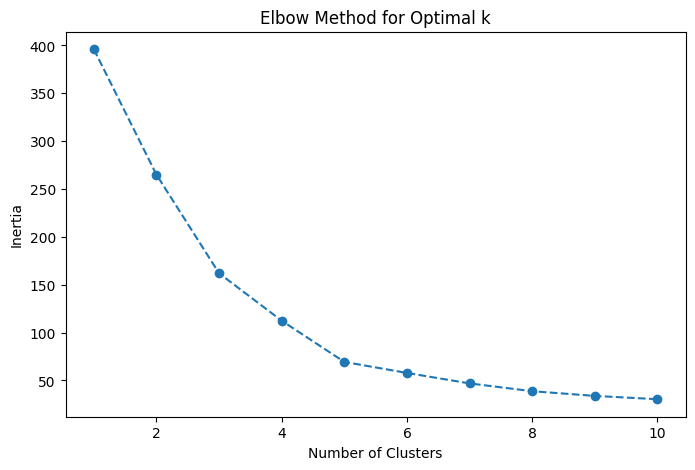

In [29]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

## Applying K-Means With Optimal Clusters

In [30]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

## Visualizing the Clusters

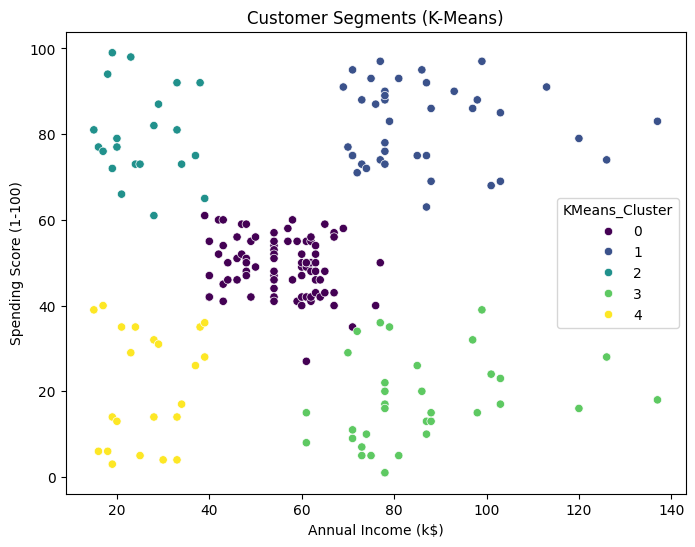

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Annual_Income'], y=df['Spending_Score'], hue=df['KMeans_Cluster'], palette='viridis')
plt.title('Customer Segments (K-Means)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Hierarchical Clustering

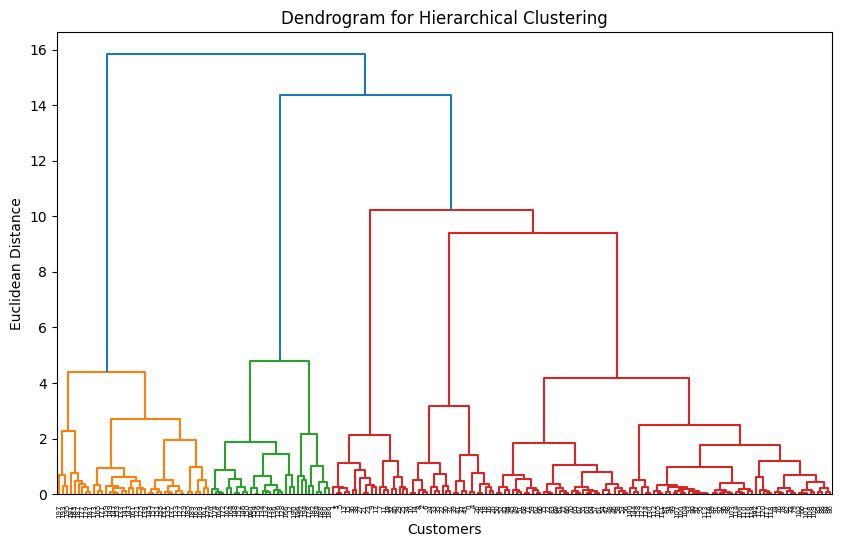

In [32]:
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

## Applying Agglomerative Clustering With Optimal Clusters

In [33]:
hierarchical = AgglomerativeClustering(n_clusters=5)
df['Hierarchical_Cluster'] = hierarchical.fit_predict(X_scaled)

## Visualizing Hierarchical Clusters

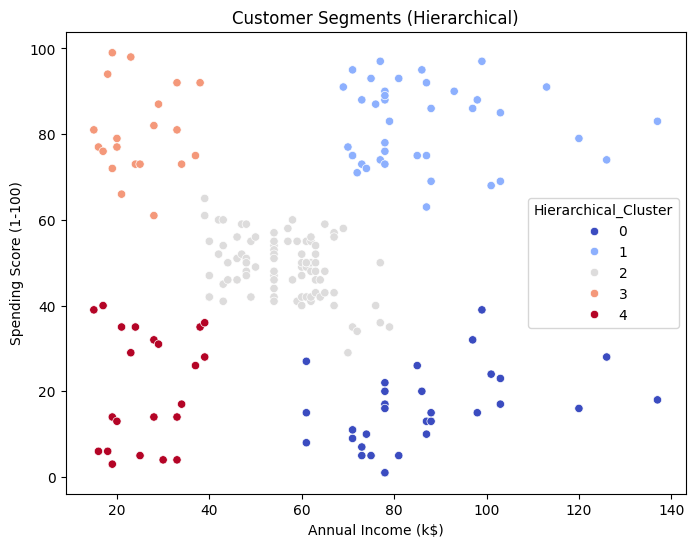

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Annual_Income'], y=df['Spending_Score'], hue=df['Hierarchical_Cluster'], palette='coolwarm')
plt.title('Customer Segments (Hierarchical)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Final Dataset

In [36]:
df.head(20)

,CustomerID,Gender,Age,Annual_Income,Spending_Score,KMeans_Cluster,Hierarchical_Cluster
0,1,Male,19.0,15.0,39.0,4,4
1,2,Male,21.0,15.0,81.0,2,3
2,3,Female,20.0,16.0,6.0,4,4
3,4,Female,23.0,16.0,77.0,2,3
4,5,Female,31.0,17.0,40.0,4,4
5,6,Female,22.0,17.0,76.0,2,3
6,7,Female,35.0,18.0,6.0,4,4
7,8,Female,23.0,18.0,94.0,2,3
8,9,Male,64.0,19.0,3.0,4,4
9,10,Female,30.0,19.0,72.0,2,3
